In [90]:
library(fpp2)
library(ggfortify)
library(gridExtra)
library(crayon)

In [91]:
# 1. 한신공영 주식의 일일 종가 자료 (표 4.3)에 대하여 다음의 작업을 수행하라. 

hs_stock <- c(8480, 8080, 7680, 7280, 7150, 6750, 6450, 6150, 6150, 6450, 6750, 7000, 
           7140, 7540, 7140, 6740, 6650, 6450, 6150, 6450, 6150, 5720, 5420, 5120, 
           4820, 4860, 5060, 5360, 5300, 5320, 5220, 5030, 5090, 5000, 5050, 5350, 
           5650, 5950, 6250, 6250, 6300, 6600, 6900, 7100, 7200, 7600, 8000, 8400, 
           8480, 8600, 8410, 8010, 7700, 8100, 8450, 8460, 8260, 7860, 8100, 7900, 
           7920, 7940, 8150, 8150, 7900, 7850, 7860, 7900, 7900, 7910, 8100, 7700, 
           7700, 7650, 7700, 7600, 7390, 7100, 6700, 6510, 6810, 6750, 6450, 6230, 
           6200, 6400, 6100, 6100, 6400, 6700, 6400, 6300, 6400, 6700, 7000, 7400, 
           7800, 7500, 7600, 8000, 8400, 8200, 7800, 8000, 7940, 8300, 8110, 8510, 
           8600, 8900, 9200, 9550, 9950, 10300, 10900, 10300, 10900, 10600)
ts_hs_stock <- ts(hs_stock, start = c(1991, 12, 1), frequency = 365.25)
str(ts_hs_stock)
data <- cbind ("시계열 자료" = ts_hs_stock,
              "1차 차분" = diff(ts_hs_stock))
str(data)

 Time-Series [1:118] from 1991 to 1991: 8480 8080 7680 7280 7150 6750 6450 6150 6150 6450 ...
 Time-Series [1:118, 1:2] from 1991 to 1991: 8480 8080 7680 7280 7150 6750 6450 6150 6150 6450 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "시계열 자료" "1차 차분"


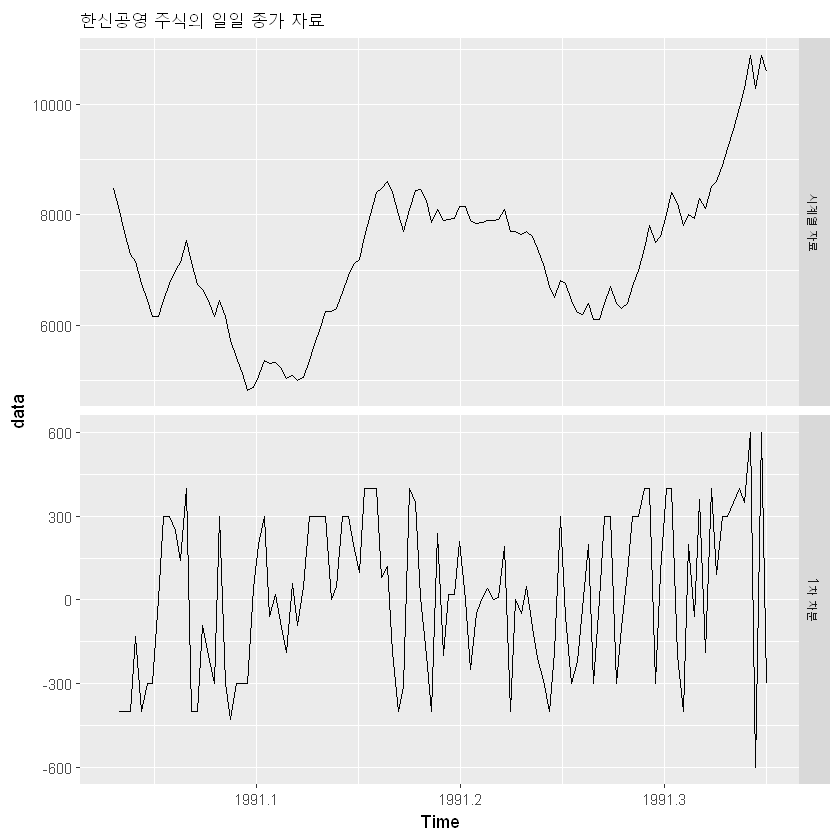

In [92]:
# (a) 교재의 그림 4.8, 4.9 와 같이 시계열 자료 {Zt} 및 1 차 차분 {▽Zt}에 대한 시도표를 그려라.

autoplot(data, facets = TRUE) +
    ggtitle("한신공영 주식의 일일 종가 자료")

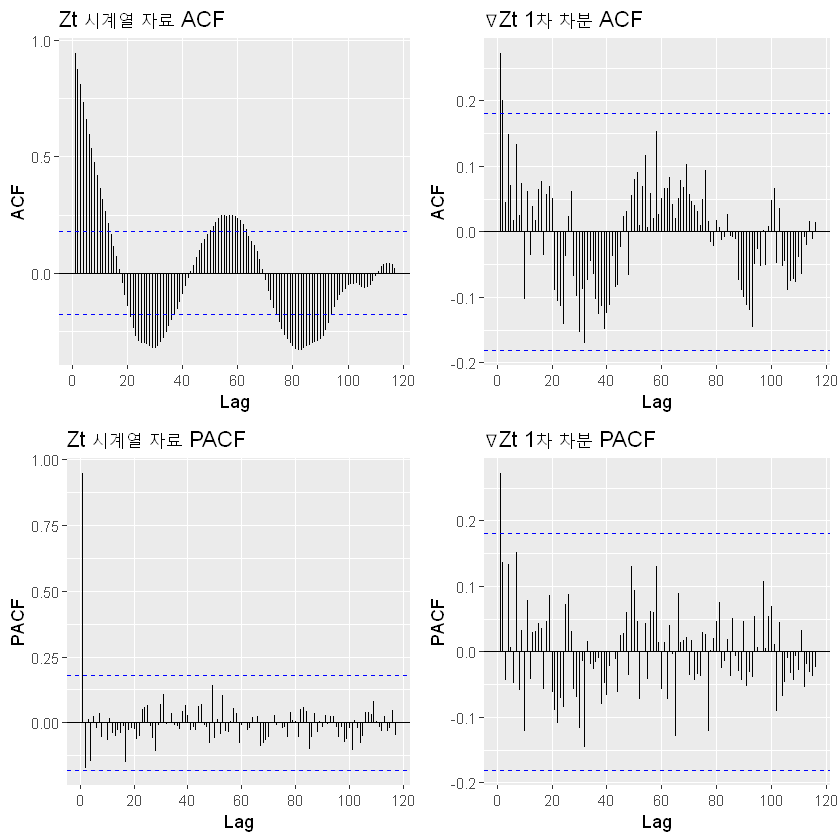

In [93]:
# (b) 그림 4.15-4.19 와 같이 {Zt} 및 {∇Zt} 에 대한 표본 상관 계수(ACF)와 부분 표본 상관계수(PACF)를 그리고 정상시계열인지 판단하라.

p1 <- ggAcf(data[,"시계열 자료"]) + ggtitle("Zt 시계열 자료 ACF")
p2 <- ggPacf(data[,"시계열 자료"]) + ggtitle("Zt 시계열 자료 PACF")
p3 <- ggAcf(data[,"1차 차분"]) + ggtitle("∇Zt 1차 차분 ACF")
p4 <- ggPacf(data[,"1차 차분"]) + ggtitle("∇Zt 1차 차분 PACF")

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 3),
        c(2, 4)))

In [94]:
# (c) 1 차 차분자료 {∇Zt}에 대하여 AR(1), AR(2), MA(1), MA(2), ARMA(1,1)을 적합하고 각 모형에 대한 AIC 값을 계산하라. 

# AR(1)
cat("[ Autoregressive : 1 / Integrated : 0 / Moving Average : 0 ]")
AR1 <- Arima(data[,"1차 차분"], order=c(1,0,0))
AR1

[ Autoregressive : 1 / Integrated : 0 / Moving Average : 0 ]

Series: data[, "1차 차분"] 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.2788  15.6985
s.e.  0.0898  34.1204

sigma^2 estimated as 72484:  log likelihood=-819.73
AIC=1645.46   AICc=1645.67   BIC=1653.74

In [95]:
# AR(2)
cat("[ Autoregressive : 2 / Integrated : 0 / Moving Average : 0 ]")
AR2 <- Arima(data[,"1차 차분"], order=c(2,0,0))
AR2

[ Autoregressive : 2 / Integrated : 0 / Moving Average : 0 ]

Series: data[, "1차 차분"] 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     mean
      0.2375  0.1451  14.6012
s.e.  0.0928  0.0953  39.3208

sigma^2 estimated as 71674:  log likelihood=-818.58
AIC=1645.16   AICc=1645.52   BIC=1656.21

In [96]:
# MA(1)
cat("[ Autoregressive : 0 / Integrated : 0 / Moving Average : 1 ]")
MA1 <- Arima(data[,"1차 차분"], order=c(0,0,1))
MA1

[ Autoregressive : 0 / Integrated : 0 / Moving Average : 1 ]

Series: data[, "1차 차분"] 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.2097  16.6474
s.e.  0.0776  30.1250

sigma^2 estimated as 74009:  log likelihood=-820.93
AIC=1647.86   AICc=1648.07   BIC=1656.14

In [97]:
# MA(2)
cat("[ Autoregressive : 0 / Integrated : 0 / Moving Average : 2 ]")
MA2 <- Arima(data[,"1차 차분"], order=c(0,0,2))
MA2

[ Autoregressive : 0 / Integrated : 0 / Moving Average : 2 ]

Series: data[, "1차 차분"] 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1     ma2     mean
      0.2627  0.1876  16.3420
s.e.  0.0958  0.0850  35.3217

sigma^2 estimated as 71748:  log likelihood=-818.64
AIC=1645.28   AICc=1645.64   BIC=1656.33

In [98]:
# ARMA(1, 1)

cat("[ Autoregressive : 1 / Integrated : 0 / Moving Average : 1 ]")
ARMA11 <- Arima(data[,"1차 차분"], order=c(1,0,1))
ARMA11

[ Autoregressive : 1 / Integrated : 0 / Moving Average : 1 ]

Series: data[, "1차 차분"] 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1     mean
      0.7124  -0.4815  12.5413
s.e.  0.2358   0.2962  43.7226

sigma^2 estimated as 71735:  log likelihood=-818.63
AIC=1645.27   AICc=1645.63   BIC=1656.32

In [103]:
MODEL <- c('AR(1)', 'AR(2)', 'MA(1)', 'MA(2)', 'ARMA(1, 1)')
AIC <- c(AR1$aic, AR2$aic, MA1$aic, MA2$aic, ARMA11$aic)
df <- data.frame(MODEL, AIC)
df

cat("Find a model with the smallest 'AIC'")
df$MODEL[which(df$AIC == min(df$AIC))]

MODEL,AIC
AR(1),1645.456
AR(2),1645.162
MA(1),1647.856
MA(2),1645.281
"ARMA(1, 1)",1645.270


Find the model smallest 'AIC'

[1] AR(2)
Levels: AR(1) AR(2) ARMA(1, 1) MA(1) MA(2)


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 18.886, df = 21, p-value = 0.5924

Model df: 3.   Total lags used: 24



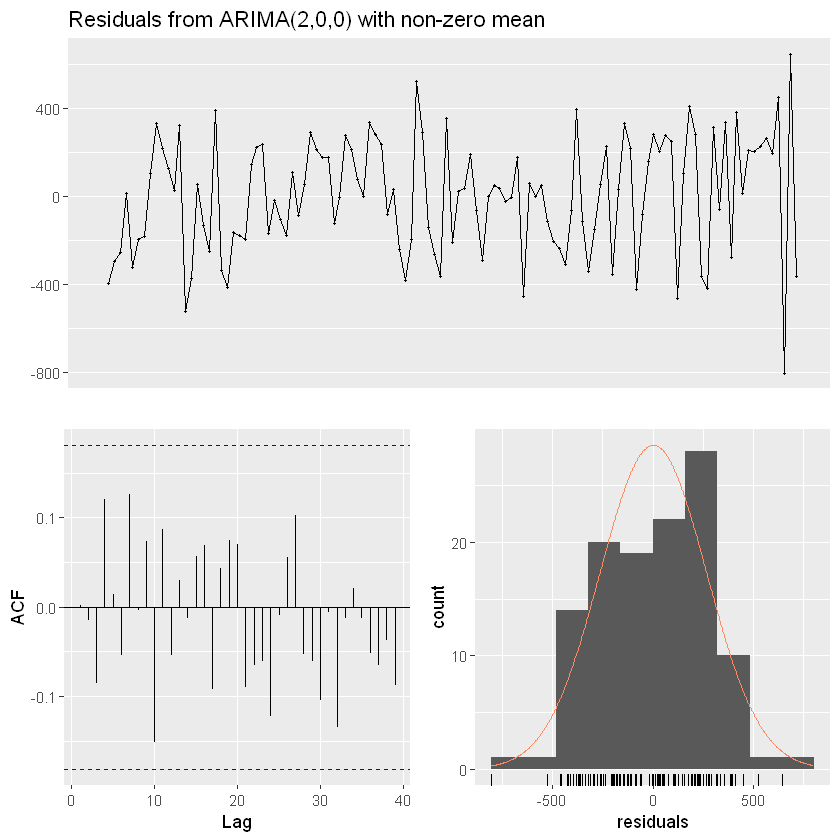

In [89]:
# 위 모형 중 가장 좋은 모형을 선택하고 선택된 모형의 잔차(residual)에 대한 그림을 그려라.
checkresiduals(AR2)